In [1]:
#Final
#Kaylee Tackett
import pandas as pd
import numpy as np
import scipy.stats as stats
from pandas import DataFrame
sal = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/final_project/salaries/salaries.csv')

## Part one (50 points): UNC Chapel Hill salaries
## Q1 (5 points)
At UNC Chapel Hill, do professors have higher incomes than assistant professors? 
Using the data provided in the link, you could determine whether or not professors have higher salaries than assistant professors. More information would be necessary about the clarification of the scope of this question to determine whether or not adjunct profs or other slightly different classifications that still fall within our two categories should be counted. We are able to determine who has the higher salary (not necessarily income because they may have other outside sources of income that are not recorded by this website) because we have the entire population data within the website.

## Q2 (5 points)

In [2]:
sal = sal.assign(empl_years = 2021 - sal.hire_year)
sal.empl_years

0         7
1         6
2        22
3         2
4         9
         ..
13096    11
13097     6
13098     3
13099    14
13100     2
Name: empl_years, Length: 13101, dtype: int64

In [3]:
sal.age.quantile(.1), sal.age.median(), sal.age.quantile(.9), sal.age.mean(), sal.age.var()

(30.0, 45.0, 62.0, 45.59285550721319, 148.71025124240305)

In [4]:
sal.annual_base_salary.quantile(.1), sal.annual_base_salary.median(), sal.annual_base_salary.quantile(.9), sal.annual_base_salary.mean(), sal.annual_base_salary.var()

(38700.0, 68472.0, 185000.0, 92797.7503640946, 5143094812.438376)

In [5]:
sal.empl_years.quantile(.1), sal.empl_years.median(), sal.empl_years.quantile(.9), sal.empl_years.mean(), sal.empl_years.var()

(2.0, 7.0, 22.0, 9.863750858713075, 73.20028971624575)

## Q3 (5 points)

<AxesSubplot:title={'center':'Age of UNC Employees'}, ylabel='Frequency'>

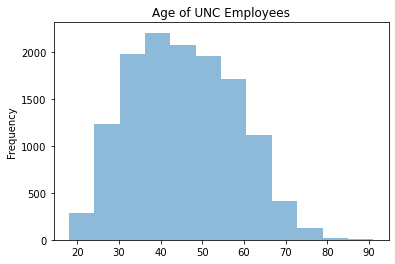

In [6]:
sal.age.plot.hist(bins=12, alpha=0.5, title= "Age of UNC Employees")

<AxesSubplot:title={'center':'Annual Base Salary of UNC Employees'}, ylabel='Frequency'>

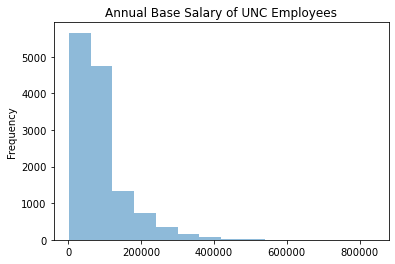

In [7]:
sal.annual_base_salary.plot.hist(bins=14, alpha=0.5, title = "Annual Base Salary of UNC Employees")

Briefly explain the ways in which the histograms are consistent with the the mean, median and variance summary statistics from Q2: 
We can see that the previous 2 histograms are consistent with the the mean, median and variance summary statistics from Q2 by noting that the highest point (occuring the most frequent) is our mean. The median is at the middle of the dataset (skewed more left on the Annual Base Salary since it follows less of a normal distribution than age). Lastly, we can see the variance reflected in the histograms by the drastic changes in the Annual Base Salary to reflect the varation of 5143094812 and less of a stark change (more normal bell curve shape) in the age histogram, which is logical considering its much smaller variance of 148.

## Q4 (2.5 points)
Display the following variables

age
annual_base_salary
empl_years
job_category
for the 10 observations with the highest annual_base_salary values.

In [8]:
sal.nlargest(10, 'annual_base_salary').age

9634     72
181      58
12310    43
1913     58
5532     55
973      47
7016     53
8809     65
3293     56
13001    61
Name: age, dtype: int64

In [9]:
sal.nlargest(10, 'annual_base_salary').annual_base_salary

9634     837720.0
181      799424.0
12310    799424.0
1913     747844.4
5532     745000.0
973      720000.0
7016     720000.0
8809     717000.0
3293     678901.8
13001    631165.0
Name: annual_base_salary, dtype: float64

In [10]:
sal.nlargest(10, 'annual_base_salary').empl_years

9634      1
181       6
12310     3
1913     10
5532      4
973       3
7016      3
8809      0
3293     24
13001    13
Name: empl_years, dtype: int64

In [11]:
sal.nlargest(10, 'annual_base_salary').job_category

9634                         professor
181                associate professor
12310              assistant professor
1913     chief athletics administrator
5532                         professor
973         assistant coach - football
7016        assistant coach - football
8809                         professor
3293                         professor
13001                        professor
Name: job_category, dtype: object

## Q5 (5 points)

In [12]:
sal.groupby('job_category').age.mean()

job_category
 foodservice lead/supervisor                             54.000000
academic advising professional                           41.540816
academic advising professional, advisor/coordinator      39.700000
academic services professional                           42.674419
academic services professional, credential specialist    50.000000
                                                           ...    
veterinarian ad                                          42.000000
vice chancellor                                          54.500000
vice provost                                             48.000000
videographer                                             36.000000
videographer -athletics                                  31.000000
Name: age, Length: 453, dtype: float64

In [13]:
sal.groupby('job_category').annual_base_salary.mean()

job_category
 foodservice lead/supervisor                              40003.000000
academic advising professional                            62962.771122
academic advising professional, advisor/coordinator       65641.550000
academic services professional                            77594.657209
academic services professional, credential specialist     51098.000000
                                                             ...      
veterinarian ad                                           50750.000000
vice chancellor                                          330255.500000
vice provost                                             269977.000000
videographer                                              58000.000000
videographer -athletics                                   49666.666667
Name: annual_base_salary, Length: 453, dtype: float64

In [14]:
sal.groupby('job_category').empl_years.mean()

job_category
 foodservice lead/supervisor                              6.000000
academic advising professional                            7.040816
academic advising professional, advisor/coordinator       4.500000
academic services professional                            7.395349
academic services professional, credential specialist     6.000000
                                                           ...    
veterinarian ad                                           2.000000
vice chancellor                                           5.500000
vice provost                                             19.000000
videographer                                              3.000000
videographer -athletics                                   2.666667
Name: empl_years, Length: 453, dtype: float64

In [15]:
sal.groupby('job_category').count()

,institution_name,last_name,first_name,init,age,initial_hire_date,annual_base_salary,home_department,primary_working_title,hire_year,empl_years
job_category,,,,,,,,,,,
foodservice lead/supervisor,1,1,1,1,1,1,1,1,1,1,1
academic advising professional,98,98,98,98,98,98,98,98,98,98,98
"academic advising professional, advisor/coordinator",10,10,10,10,10,10,10,10,10,10,10
academic services professional,43,43,43,43,43,43,43,43,43,43,43
"academic services professional, credential specialist",1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
veterinarian ad,1,1,1,1,1,1,1,1,1,1,1
vice chancellor,4,4,4,4,4,4,4,4,4,4,4
vice provost,1,1,1,1,1,1,1,1,1,1,1


In [16]:
sal.job_category.count()

13101

## Q6 (7.5 points)
List the top 10 job categories by mean of annual_base_salary, using your answer to Q5
Compare this list with the top-10 list from Q4. Specifically, are the job categories represented the same? How can you explain the differences or similarities?
Hint: Use the definition of the mean

In [91]:
sal.nlargest(10, 'annual_base_salary').job_category, sal.nlargest(10, 'annual_base_salary').annual_base_salary

(9634                         professor
 181                associate professor
 12310              assistant professor
 1913     chief athletics administrator
 5532                         professor
 973         assistant coach - football
 7016        assistant coach - football
 8809                         professor
 3293                         professor
 13001                        professor
 Name: job_category, dtype: object,
 9634     837720.0
 181      799424.0
 12310    799424.0
 1913     747844.4
 5532     745000.0
 973      720000.0
 7016     720000.0
 8809     717000.0
 3293     678901.8
 13001    631165.0
 Name: annual_base_salary, dtype: float64)

In [89]:
dd = pd.DataFrame(sal.groupby('job_category').annual_base_salary.mean())
dd.nlargest(10, 'annual_base_salary')

,annual_base_salary
job_category,
chief athletics administrator,747844.400000
chancellor,620000.000000
"dean, business",514326.550000
head coach - men's basketball,500000.000000
chief academic affairs officer / provost,493182.000000
chief development / advancement officer,466160.210000
"dean, law",404934.000000
chief legal affairs officer,400000.000000
assistant coach - football,388277.545455


No the job categories are not represented the same in both above charts (first from Q4 and second from Q5). This is because of the way that the data is accumulated and represented for each chart. The second chart is the mean or average base salary for the listed job categories. The charts from Q4 simply show the highest 10 overall salaries. These could be outliers or things of that nature. Q5 table shows the highest average salaries rather than only the 10 highest instances recorded in our data and this explains the discrepances.

## Q7 (5 points)

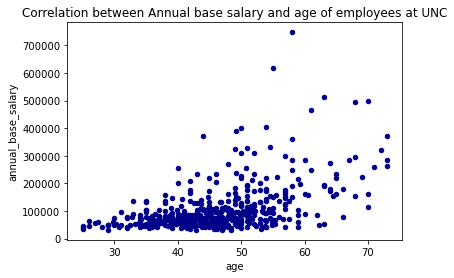

In [65]:
df = pd.DataFrame([sal.groupby('job_category').age.mean(), sal.groupby('job_category').annual_base_salary.mean()])
df = df.T
ax1 = df.plot.scatter(x='age',
                      y='annual_base_salary',
                      c='DarkBlue',
                      title = 'Correlation between Annual base salary and age of employees at UNC')

## Q8 (5 points)
The correlation of age and annual base salary calculated does make sense given the above plot. The correlation is about 1/2, meaning that there is a slight positive correlation. In terms of our data, this would mean that as we examine older employees, their annual base salary tends to increase. This is also visible from the plot given the weak diagonal line from the points.

In [67]:
df.loc[:, 'age'].corr(df.loc[:, 'annual_base_salary'])

0.49878061315421435

## Q9 (10 points)


In [85]:
d = pd.DataFrame([sal.groupby('job_category').age.mean(), sal.groupby('job_category').annual_base_salary.mean(), sal.groupby('job_category').empl_years.mean()])
d = d.T
x = sal.groupby('job_category').count().T
d.loc[:, 'age'].corr(d.loc[:, 'empl_years']), d.loc[:, 'annual_base_salary'].corr(d.loc[:, 'empl_years']),d.loc[:, 'age'].corr(x.iloc[0]), d.loc[:, 'annual_base_salary'].corr(x.iloc[0]), d.loc[:, 'empl_years'].corr(x.iloc[0])

(0.6141323129249139,
 0.26327890850970465,
 -0.022852424202558726,
 -0.048381327381430354,
 0.009843594129839088)

Based on that information, explain briefly whether empl_years is or is not a possible 'confounding' or 'lurking' variable for the purpose of understanding correlation between age and annual_base_salary:
I think that empl_years could be a possible confounding variable considering the correlation between it and the salary was very insignificant, meaning it had little effect or bearance on our salary variable. There was a slight correlation between age and empl_years, which makes sense because older people will have tended to be employed longer; however, that is not pertinent to our assessment of the correlation between age and annual_base_salary.

## Part two (50 points): Tree canopy in Orange and Durham counties
## Q1 (5 points)

In [18]:
canopy = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/final_project/canopy/canopy.csv')

In [105]:
canopy.loc[canopy['value'] < 40, 'tree_target'] = 0
canopy.loc[canopy['value'] >= 40, 'tree_target'] = 1
canopy.tree_target

0          0.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2019110    1.0
2019111    0.0
2019112    0.0
2019113    1.0
2019114    1.0
Name: tree_target, Length: 2019115, dtype: float64

In [20]:
canopy.groupby('county').value.mean()

county
durham    57.514916
orange    62.904759
Name: value, dtype: float64

In [21]:
canopy.groupby('county').tree_target.mean()

county
durham    0.655700
orange    0.694709
Name: tree_target, dtype: float64

In [22]:
canopy.groupby('county').count()

,value,tree_target
county,,
durham,857122,857122
orange,1161993,1161993


## Q2 (7.5 points)
A binomial distribution is appropriate for the number of observations in each sample of size 20 such that tree_target is 1 because it satisfies the 4 conditions and because the decription of our problem explains that we are counting the successes in independent trials. Each observation is one of 2 possibilities - either a success or failure ( 1 or 0 in the case of our data), all observations are independent, there is a fixed number of observations, and the probability of success, p, is the same for each observation. We would expect the theoretical mean to be 0.655700 for the tree_target of Durham county and  57.514916 to be the value mean for Durham county.

## Q3 (7.5 points)
These means should be close to the expected values calculated above because the mean of a sample is always very close to the population mean (given an appropriate sample). So with our random sample of 100, it makes sense that our data is reflective of the population.

In [131]:
import random
s = [canopy.loc[canopy.county=='durham'].sample(i, replace = True).reset_index(drop = True) for i in [100]]
s[0].value.mean(), s[0].tree_target.mean()

(58.34, 0.66)

## Q4 (10 points)
create a random sample from the dataset of size 100 observations. I will refer to this as 'sample 0'
create a random sample from the dataset of size 20 observations. I will refer to this as sample 1.
for each sample, calculate by county
the mean of value, meaning the average tree canopy coverage
the standard deviation of value
the number of samples from each county
the standard error for the appropriate sample size --- in other words, give a point estimate for the standard deviation for the mean of a random sample of size 100 and 20, respectively

In [23]:
import random
samples = [canopy.sample(i, replace = True).reset_index(drop = True) for i in [100, 20]]

In [24]:
samples[0].groupby('county').value.mean(), samples[0].groupby('county').value.std(), samples[0].groupby('county').count()

(county
 durham    44.743590
 orange    62.672131
 Name: value, dtype: float64,
 county
 durham    37.024684
 orange    43.759083
 Name: value, dtype: float64,
         value  tree_target
 county                    
 durham     39           39
 orange     61           61)

In [25]:
samples[1].groupby('county').value.mean(), samples[1].groupby('county').value.std(), samples[1].groupby('county').count()

(county
 durham    37.000000
 orange    58.153846
 Name: value, dtype: float64,
 county
 durham    47.042534
 orange    40.922378
 Name: value, dtype: float64,
         value  tree_target
 county                    
 durham      7            7
 orange     13           13)

In [26]:
# give a point estimate for the standard deviation for the mean of a random sample of size 100 and 20, respectively
se0 = samples[0].value.std()/(samples[0].count() ** 0.5)
se1 = samples[1].value.std()/(samples[1].count() ** 0.5)
se0 = se0.value
se1 = se1.value
se0,se1

(4.199924963254665, 9.653162830470588)

## Q5 (10 points)

In [132]:
zScore = 1.405
me0 = zScore*se0
me1 = zScore*se1
durhamMean = samples[0].groupby('county').value.mean()[0]
ci00 = durhamMean + me0
ci01 = durhamMean - me0
ci10 = durhamMean + me1
ci11 = durhamMean - me1
#sample0 CI:
ci01,ci00

(38.84269517021694, 50.64448431696255)

In [133]:
#sample1 CI:
ci11,ci10

(31.180895966778568, 58.306283520400925)

compare these two confidence intervals, and explain why they differ in size --- if in fact they do: The two confidence intervals differ in size by about 15. The interval for our larger sample size is smaller than the interval for the small sample size. This makes sense because with more data, we are able to increase our confidence and tighten the interval.

## Q6 (10 points)

In [29]:
dhat = samples[0].loc[:, ['county', 'value']].groupby('county').agg(['mean', 'std', 'size'])
dhat.columns = dhat.columns.droplevel(0)
dhat = dhat.assign(serr = dhat.loc[:, 'std'] / dhat.loc[:, 'size']**.5)
dhat

,mean,std,size,serr
county,,,,
durham,44.743590,37.024684,39,5.928694
orange,62.672131,43.759083,61,5.602777


In [30]:
s = (dhat.loc['durham', 'serr']**2 + dhat.loc['orange', 'serr']**2)**.5
z = -abs(dhat.loc['durham', 'mean'] - dhat.loc['orange', 'mean'])/s
s, z

(8.157237367922543, -2.1978692779559528)

In [31]:
p = 2*stats.norm.cdf(-z)
p0 = p

In [32]:
dhat = samples[1].loc[:, ['county', 'value']].groupby('county').agg(['mean', 'std', 'size'])
dhat.columns = dhat.columns.droplevel(0)
dhat = dhat.assign(serr = dhat.loc[:, 'std'] / dhat.loc[:, 'size']**.5)
s = (dhat.loc['durham', 'serr']**2 + dhat.loc['orange', 'serr']**2)**.5
z = -abs(dhat.loc['durham', 'mean'] - dhat.loc['orange', 'mean'])/s
s, z

(21.09410812470587, -1.0028319770045322)

In [99]:
p = 2*stats.norm.cdf(-z)
p1 = p

In [34]:
p0,p1

(1.9720415772211544, 1.6840580625669985)

We fail to reject the null hypothesis and cannot accept the alternative hypothesis in both cases of sample0 and sample1 because our p values are greater than our alpha of 0.075. Sample0 would be better to base any conclusions on because it is the larger sample size and is much more likely to accurately reflect the population from which it was sampled. If we were to choose the smaller sample, we may come to conclusions that are not reflective of our population simply due to the possibilities of randomness when we randomly selected our samples.